In [ ]:
#import required libraries 
import pandas as pd 
import matplotlib.pyplot as plt 
import pyreadstat

In [3]:
# Read the SPSS .sav file
df, meta = pyreadstat.read_sav("perv1.sav")
df['Year']=2020
# Save cleaned DataFrame as CSV for further use
df.to_csv("perv1.csv", index=False)



In [4]:
df.head()

,FI_perv1,B1q2_perv1,qtr_perv1,visit_perv1,b1q3_perv1,state_perv1,distcode_perv1,nss_region_perv1,b1q5_perv1,b1q6_perv1,...,b7pt2_q11_perv1,b7pt2_q12_perv1,b7pt2_q13_perv1,b7pt2_q14_perv1,b7pt2_q15_perv1,NSS_perv1,NSC_perv1,mult_perv1,no_qtr_perv1,Year
0,FVP4,104,Q5,V1,1,14,05,141,01,08,...,,,,,,3.0,6.0,81181.0,4.0,2020
1,FVP4,104,Q5,V1,1,14,05,141,01,08,...,,,,,,3.0,6.0,81181.0,4.0,2020
2,FVP4,104,Q5,V1,1,14,05,141,01,08,...,,,,,,3.0,6.0,81181.0,4.0,2020
3,FVP4,104,Q5,V1,1,14,05,141,01,08,...,,,,,,3.0,6.0,81181.0,4.0,2020
4,FVP4,104,Q5,V1,1,14,05,141,01,08,...,,,,,,3.0,6.0,81181.0,4.0,2020


In [5]:
print(meta.column_labels)

['File Identification', 'Schdule', 'Quarter', 'Visit', 'Sector', 'State/Ut Code', 'District Code', 'NSS-Region', 'Stratum', 'Sub-Stratum', 'Sub-Sample', 'Fod Sub-Region', 'FSU', 'Sample Sg/Sb No.', 'Second Stage Stratum No.', 'Sample Household Number', 'Person Serial No.', 'Relationship To Head', 'Sex', 'Age', 'Marital Status', 'General Educaion Level', 'Technical Educaion Level', 'No. of years in Formal Education', 'Status of Current Attendance in Educational Institution', 'Whether received any Vocational/Technical Training', 'Whether Training completed during last 365 Days', 'Field Of Training', 'Duration Of Training', 'Type Of Training', 'Source Of Funding The Training', 'Status Code', 'Industry Code (NIC)', 'Occupation Code (NCO)', 'Whether Engaged In Any Work In Subsidiary Capacity', '(Principal)location Of Workplace Code', '(Principal) Enterprise Type Code', '(Principal) No. Of Workers In The Enterprise', '(Principal)  Type Of Job Contract', '(Principal) Eligble Of Paid Leave', '

In [6]:
#Map MOSPI variable codes to descriptive labels.
for col, label in list( zip(meta.column_names, meta.column_labels))[:20]:
    print(f"{col} --> {label}")


FI_perv1 --> File Identification
B1q2_perv1 --> Schdule
qtr_perv1 --> Quarter
visit_perv1 --> Visit
b1q3_perv1 --> Sector
state_perv1 --> State/Ut Code
distcode_perv1 --> District Code
nss_region_perv1 --> NSS-Region
b1q5_perv1 --> Stratum
b1q6_perv1 --> Sub-Stratum
b1q11_perv1 --> Sub-Sample
b1q12_perv1 --> Fod Sub-Region
b1q1_perv1 --> FSU
b1q13_perv1 --> Sample Sg/Sb No.
b1q14_perv1 --> Second Stage Stratum No.
b1q15_perv1 --> Sample Household Number
b4q1_perv1 --> Person Serial No.
b4q4_perv1 --> Relationship To Head
b4q5_perv1 --> Sex
b4q6_perv1 --> Age


In [7]:
print(meta.value_labels.keys())
#ctual category definitions are missing



dict_keys(['labels0', 'labels1', 'labels2', 'labels3', 'labels4', 'labels5', 'labels6', 'labels7', 'labels8', 'labels9', 'labels10', 'labels11', 'labels12', 'labels13', 'labels14', 'labels15', 'labels16', 'labels17', 'labels18', 'labels19', 'labels20', 'labels21', 'labels22', 'labels23', 'labels24', 'labels25', 'labels26', 'labels27', 'labels28', 'labels29', 'labels30', 'labels31', 'labels32', 'labels33', 'labels34', 'labels35'])


In [8]:
#make another file of dictionaries and import
%run "plfs_mapping.ipynb"
#store and map readable labels
df['sex_clean']=df['b4q5_perv1'].map(sex_map)
df['status_clean']=df['b5pt1q3_perv1'].map(activity_map)
df['subsidiary_clean']=df['b5pt1q7_perv1'].map(subsidiary_map)
df['state_clean']=df['state_perv1'].map(state_map)
df['age']=df['b4q6_perv1']
df['weight']=df['mult_perv1']

In [9]:
#handle missing values using fillna

df['sex_clean'].fillna('Unknown',inplace=True)
df['subsidiary_clean'].fillna('Unknown',inplace=True)
df['state_clean'].fillna('Unknown',inplace=True)
df['status_clean'].fillna('Unknown',inplace=True)

In [10]:
#drop missing values from age and weight
df=df.dropna(subset=['age','weight'])


In [12]:
#classify activity status into groups
def activity_class(code):
    if str(code) in ['11','12','21','31','41','51']:#working
       return 'Employed'
    elif str(code)=='81':#seeking work
        return "Unemployed"
    else:
        return "Out of labour force"


In [13]:
#add new column for labour status
df['labour_status']=df['b5pt1q3_perv1'].apply(activity_class)
df.head()

,FI_perv1,B1q2_perv1,qtr_perv1,visit_perv1,b1q3_perv1,state_perv1,distcode_perv1,nss_region_perv1,b1q5_perv1,b1q6_perv1,...,mult_perv1,no_qtr_perv1,Year,sex_clean,status_clean,subsidiary_clean,state_clean,age,weight,labour_status
0,FVP4,104,Q5,V1,1,14,05,141,01,08,...,81181.0,4.0,2020,male,Worked in h.h. enterprise (self-employed): own...,no,Maharashtra,54.0,81181.0,Employed
1,FVP4,104,Q5,V1,1,14,05,141,01,08,...,81181.0,4.0,2020,female,Domestic duties + free collection of goods/sew...,no,Maharashtra,50.0,81181.0,Out of labour force
2,FVP4,104,Q5,V1,1,14,05,141,01,08,...,81181.0,4.0,2020,female,Worked as regular salaried/wage employee,no,Maharashtra,28.0,81181.0,Employed
3,FVP4,104,Q5,V1,1,14,05,141,01,08,...,81181.0,4.0,2020,female,Worked in h.h. enterprise (self-employed): own...,no,Maharashtra,24.0,81181.0,Employed
4,FVP4,104,Q5,V1,1,14,05,141,01,08,...,81181.0,4.0,2020,male,Attended educational institution,no,Maharashtra,16.0,81181.0,Out of labour force


In [14]:
#get the population participating in labour force
labour_force=df[df['labour_status'].isin(['Employed','Unemployed'])]

In [15]:
df[["b5pt1q3_perv1","status_clean","labour_status"]].head(10) #confirm mapping


,b5pt1q3_perv1,status_clean,labour_status
0,11,Worked in h.h. enterprise (self-employed): own...,Employed
1,93,Domestic duties + free collection of goods/sew...,Out of labour force
2,31,Worked as regular salaried/wage employee,Employed
3,11,Worked in h.h. enterprise (self-employed): own...,Employed
4,91,Attended educational institution,Out of labour force
5,31,Worked as regular salaried/wage employee,Employed
6,11,Worked in h.h. enterprise (self-employed): own...,Employed
7,91,Attended educational institution,Out of labour force
8,91,Attended educational institution,Out of labour force
9,11,Worked in h.h. enterprise (self-employed): own...,Employed


In [16]:
#filter working age 
df_working=df[df["age"].between(15,59)]

In [17]:
# weighted unemployed and employed
unemployed_weight = df_working.loc[df_working["labour_status"]=="Unemployed", "weight"].sum()
employed_weight   = df_working.loc[df_working["labour_status"]=="Employed", "weight"].sum()
working_age_weight=df_working['weight'].sum()
# unemployment rate
unemployment_rate = unemployed_weight / (unemployed_weight + employed_weight)

print(f"Unemployment Rate: {unemployment_rate*100:.2f}%")


Unemployment Rate: 5.32%


In [23]:
#labour force participation rate
LFPR= (unemployed_weight+ employed_weight)/working_age_weight *100
print(f"LFPR:{ LFPR:.2f} %")

LFPR:54.97 %


In [24]:
#Worker population ratio
WPR= employed_weight/working_age_weight * 100
print(f"Worker population ratio:{ WPR:.2f} %")

Worker population ratio:52.05 %


# Year 2019 & 2021


In [25]:
df_2019 , meta2= pyreadstat.read_sav('PERFV_2019-20.sav')
df_2019['Year']=2019 #new column - year

df_2021 , meta3= pyreadstat.read_sav('perv1-22.sav')
df_2021['Year']=2021

In [26]:
#rename column of 2019 to match 2020 & 2021
df_2019.rename(columns={
    'b4q6_per_fv': 'b4q6_perv1',
    'b4q5_per_fv': 'b4q5_perv1',
    'MULT_per_fv': 'mult_perv1',
    'b5pt1q3_per_fv': 'b5pt1q3_perv1',
    'b5pt1q7_per_fv': 'b5pt1q7_perv1',
    'state_per_fv':'state_perv1'
}, inplace=True)

In [27]:
df_2019.head()

,FI_per_fv,b1q2_per_fv,quarter_per_fv,visit_per_fv,b1q3_per_fv,state_perv1,b1q4_per_fv,nss_region_per_fv,b1q5_per_fv,b1q6_per_fv,...,b6q5_per_fv,b6q6_per_fv,b6q7_per_fv,b6q9_per_fv,b6q10_per_fv,NSS_per_fv,NSC_per_fv,mult_perv1,No_qtr_per_fv,Year
0,FVP3,104,Q1,V1,1,14,06,141,01,08,...,31,84,345,24000.0,0.0,3.0,6.0,47117.0,4.0,2019
1,FVP3,104,Q1,V1,1,14,06,141,01,08,...,92,,,0.0,0.0,3.0,6.0,47117.0,4.0,2019
2,FVP3,104,Q1,V1,1,14,06,141,01,08,...,91,,,0.0,0.0,3.0,6.0,47117.0,4.0,2019
3,FVP3,104,Q1,V1,1,14,06,141,01,08,...,91,,,0.0,0.0,3.0,6.0,47117.0,4.0,2019
4,FVP3,104,Q1,V1,1,14,06,141,01,08,...,11,01,920,0.0,6000.0,3.0,6.0,20459.0,4.0,2019


In [28]:
%run "plfs_mapping.ipynb"
#store and map readable labels for 2019 and 2021
df_2019['sex_clean']=df_2019['b4q5_perv1'].map(sex_map)
df_2019['status_clean']=df_2019['b5pt1q3_perv1'].map(activity_map)
df_2019['subsidiary_clean']=df_2019['b5pt1q7_perv1'].map(subsidiary_map)
df_2019['state_clean']=df_2019['state_perv1'].map(state_map)
df_2019['age']=df_2019['b4q6_perv1']
df_2019['weight']=df_2019['mult_perv1'] 

df_2021['sex_clean']=df_2021['b4q5_perv1'].map(sex_map)
df_2021['status_clean']=df_2021['b5pt1q3_perv1'].map(activity_map)
df_2021['subsidiary_clean']=df_2021['b5pt1q7_perv1'].map(subsidiary_map)
df_2021['state_clean']=df_2021['state_perv1'].map(state_map)
df_2021['age']=df_2021['b4q6_perv1']
df_2021['weight']=df_2021['mult_perv1']

In [29]:
df_2021[:5]


,FI_perv1,B1q2_perv1,qtr_perv1,visit_perv1,b1q3_perv1,state_perv1,distcode_perv1,nss_region_perv1,b1q5_perv1,b1q6_perv1,...,NSC_perv1,mult_perv1,no_qtr_perv1,Year,sex_clean,status_clean,subsidiary_clean,state_clean,age,weight
0,FVP5,104,Q1,V1,1,23,06,236,06,01,...,2.0,2553695.0,4.0,2021,male,Worked in h.h. enterprise (self-employed): own...,no,Tamil Nadu,45.0,2553695.0
1,FVP5,104,Q1,V1,1,23,06,236,06,01,...,2.0,2553695.0,4.0,2021,female,Domestic duties + free collection of goods/sew...,yes,Tamil Nadu,42.0,2553695.0
2,FVP5,104,Q1,V1,1,23,06,236,06,01,...,2.0,2553695.0,4.0,2021,male,Attended educational institution,no,Tamil Nadu,17.0,2553695.0
3,FVP5,104,Q1,V1,1,23,06,236,06,01,...,2.0,2553695.0,4.0,2021,female,Attended educational institution,no,Tamil Nadu,19.0,2553695.0
4,FVP5,104,Q1,V1,1,23,06,236,06,01,...,2.0,2553695.0,4.0,2021,male,Worked in h.h. enterprise (self-employed): own...,yes,Tamil Nadu,51.0,2553695.0


In [30]:
df_2019['labour_status']=df_2019['b5pt1q3_perv1'].apply(activity_class)
df_2021['labour_status']=df_2021['b5pt1q3_perv1'].apply(activity_class)


In [31]:
# Keep only relevant columns for analysis
columns_needed=['age','sex_clean','subsidiary_clean','state_clean','weight','Year','status_clean','labour_status']
df_2019 = df_2019[columns_needed]
df = df[columns_needed]
df_2021 = df_2021[columns_needed]

df_all = pd.concat([df_2019, df, df_2021], ignore_index=True) #stacking all dataframes

In [32]:
df_all.head()

,age,sex_clean,subsidiary_clean,state_clean,weight,Year,status_clean,labour_status
0,47,male,no,Maharashtra,47117.0,2019,Worked as regular salaried/wage employee,Employed
1,45,female,no,Maharashtra,47117.0,2019,Attended domestic duties only,Out of labour force
2,19,male,no,Maharashtra,47117.0,2019,Attended educational institution,Out of labour force
3,18,male,no,Maharashtra,47117.0,2019,Attended educational institution,Out of labour force
4,59,male,no,Maharashtra,20459.0,2019,Worked in h.h. enterprise (self-employed): own...,Employed


In [33]:
df_all['age'] = pd.to_numeric(df_all['age'], errors='coerce') #convert all age to numeric
df_all_working = df_all[df_all['age'].between(15,59)] #Working age from 15-59
#Calculating basic counts of all years
yearly = df_all_working.groupby(["Year", "labour_status"])["weight"].sum().reset_index() #group by year and labour status
yearly



,Year,labour_status,weight
0,2019,Employed,2.932938e+11
1,2019,Out of labour force,2.575935e+11
2,2019,Unemployed,1.796176e+10
3,2020,Employed,2.974816e+11
4,2020,Out of labour force,2.573751e+11
5,2020,Unemployed,1.672660e+10
6,2021,Employed,3.090100e+11
7,2021,Out of labour force,2.662233e+11
8,2021,Unemployed,1.685107e+10


In [34]:
#reshape into wider table
emp=yearly.pivot(index='Year',columns='labour_status',values='weight').fillna(0)
emp

labour_status,Employed,Out of labour force,Unemployed
Year,,,
2019,2.932938e+11,2.575935e+11,1.796176e+10
2020,2.974816e+11,2.573751e+11,1.672660e+10
2021,3.090100e+11,2.662233e+11,1.685107e+10


In [35]:
emp['Labour_force']=emp['Employed']+emp['Unemployed']
emp['Working_age_wt']=emp['Labour_force']+emp['Out of labour force']

emp['Unemployment_rate']= (emp['Unemployed']/emp['Labour_force'] ) *100
emp['WPR']=(emp['Employed']/emp['Working_age_wt'])*100
emp['LFPR']=(emp['Labour_force']/emp['Working_age_wt'])*100
emp                                         

labour_status,Employed,Out of labour force,Unemployed,Labour_force,Working_age_wt,Unemployment_rate,WPR,LFPR
Year,,,,,,,,
2019,2.932938e+11,2.575935e+11,1.796176e+10,3.112555e+11,5.688490e+11,5.770745,51.559163,54.716725
2020,2.974816e+11,2.573751e+11,1.672660e+10,3.142082e+11,5.715833e+11,5.323414,52.045186,54.971549
2021,3.090100e+11,2.662233e+11,1.685107e+10,3.258610e+11,5.920844e+11,5.171243,52.190193,55.036251


# Filter dataset based on sex

In [36]:

yearly2 = df_all_working.groupby(["Year", "sex_clean","labour_status"])["weight"].sum().reset_index()

In [37]:
emp2=yearly2.pivot(index=['Year','sex_clean'],columns='labour_status',values='weight').fillna(0)
emp2

labour_status         Employed  Out of labour force    Unemployed
Year sex_clean                                                   
2019 female       7.645430e+10         2.023842e+11  4.358929e+09
     male         2.167520e+11         5.515897e+10  1.360239e+10
     transgender  8.743466e+07         5.026110e+07  4.459400e+05
2020 female       8.078868e+10         1.986650e+11  4.018104e+09
     male         2.166402e+11         5.865096e+10  1.270134e+10
     transgender  5.276928e+07         5.911755e+07  7.157291e+06
2021 female       8.046876e+10         2.086676e+11  4.026750e+09
     male         2.285295e+11         5.754402e+10  1.282432e+10
     transgender  1.168923e+07         1.168341e+07  0.000000e+00

In [38]:
emp2['Labour_force']=emp2['Employed']+emp2['Unemployed']
emp2['Working_age_wt']=emp2['Labour_force']+emp2['Out of labour force']

emp2['Unemployment_rate']= (emp2['Unemployed']/emp2['Labour_force'] ) *100
emp2['WPR']=(emp2['Employed']/emp2['Working_age_wt'])*100
emp2['LFPR']=(emp2['Labour_force']/emp2['Working_age_wt'])*100
emp2  

labour_status         Employed  Out of labour force    Unemployed  \
Year sex_clean                                                      
2019 female       7.645430e+10         2.023842e+11  4.358929e+09   
     male         2.167520e+11         5.515897e+10  1.360239e+10   
     transgender  8.743466e+07         5.026110e+07  4.459400e+05   
2020 female       8.078868e+10         1.986650e+11  4.018104e+09   
     male         2.166402e+11         5.865096e+10  1.270134e+10   
     transgender  5.276928e+07         5.911755e+07  7.157291e+06   
2021 female       8.046876e+10         2.086676e+11  4.026750e+09   
     male         2.285295e+11         5.754402e+10  1.282432e+10   
     transgender  1.168923e+07         1.168341e+07  0.000000e+00   

labour_status     Labour_force  Working_age_wt  Unemployment_rate        WPR  \
Year sex_clean                                                                 
2019 female       8.081323e+10    2.831975e+11           5.393831  26.996819   
     male         2.303544e+11    2.855134e+11           5.904982  75.916592   
     transgender  8.788060e+07    1.381417e+08           0.507439  63.293461   
2020 female       8.480678e+10    2.834718e+11           4.737951  28.499722   
     male         2.293415e+11    2.879925e+11           5.538179  75.224245   
     transgender  5.992657e+07    1.190441e+08          11.943436  44.327496   
2021 female       8.449551e+10    2.931631e+11           4.765637  27.448459   
     male         2.413538e+11    2.988979e+11           5.313492  76.457397   
     transgender  1.168923e+07    2.337264e+07           0.000000  50.012444   

labour_status          LFPR  
Year sex_clean               
2019 female       28.536002  
     male         80.680777  
     transgender  63.616274  
2020 female       29.917183  
     male         79.634549  
     transgender  50.339797  
2021 female       28.822011  
     male         80.747931  
     transgender  50.012444

In [39]:
# Save them as CSV
labour=emp.reset_index()
labour_gender=emp2.reset_index()
labour.to_csv("labour.csv", index=False)
labour_gender.to_csv("labour_gender.csv", index=False)

# Visualization

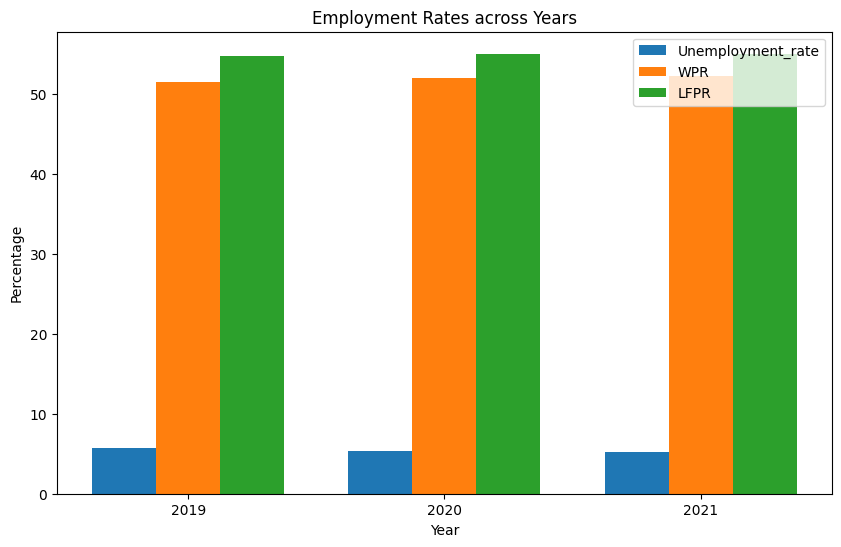

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Example: values from your DataFrame
years = emp.index.values
unemp = emp["Unemployment_rate"].values
wpr   = emp["WPR"].values
lfpr  = emp["LFPR"].values

x = np.arange(len(years))  # positions for years
width = 0.25               # width of each bar

plt.figure(figsize=(10,6))

plt.bar(x - width, unemp, width, label="Unemployment_rate")
plt.bar(x, wpr, width, label="WPR")
plt.bar(x + width, lfpr, width, label="LFPR")

# Formatting
plt.xticks(x, years)
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Employment Rates across Years")
plt.legend()
plt.show()


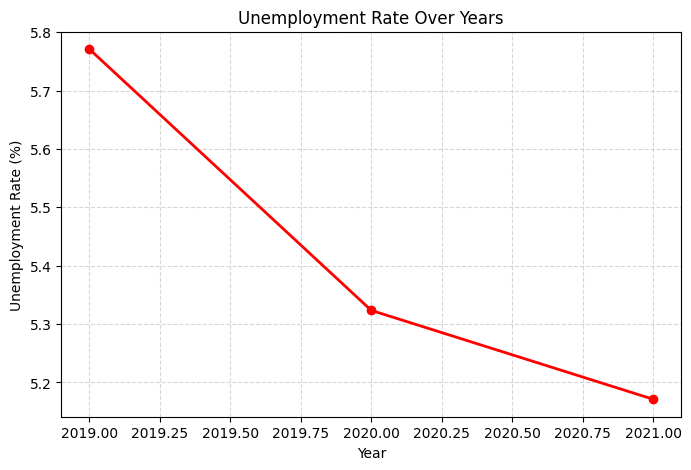

In [59]:
plt.figure(figsize=(8,5))
plt.plot(emp.index, emp["Unemployment_rate"], marker='o', color='red', linewidth=2)

plt.title("Unemployment Rate Over Years")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()